In [1]:
#%reset -f
import os
from pandas import Series
import pandasql
from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima_model import ARIMAResults
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from pandas import DataFrame
# from scipy.stats import boxcox
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from sklearn import linear_model
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
sns.set(color_codes=True)
from pandas import read_csv
import matplotlib as mpl
from matplotlib import pyplot
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report



In [2]:
# This funtion takes the file and checks & processes
def LoadFile(dataFileName):
    isExisted = os.path.isfile(dataFileName)
    if isExisted == True: # Read in the data when the file does exist
        df = pd.read_csv(dataFileName, encoding = 'latin-1')
    else: # Print our message when the file provide does not exist
        print("File name:", dataFileName, "does not exist in", os.getcwd(), "folder")
    return pd.DataFrame(df)

In [3]:
# Load files by using LoadFile function defines above
states_by_county_death = LoadFile("data/COVID-19_Death_Counts_in_the_United_States_by_County.csv")
state = LoadFile("data/State.csv")
us_counties_cases_deathss = LoadFile("data/us_counties.csv")
us_counties_cases_deaths = LoadFile("data/us_counties_cases_deaths.csv")
detail_2018_county_health_rankings = LoadFile("data/detail_2018_county_health_rankings.csv")
overall_2018_county_health_ranking = LoadFile("data/overall_2018_county_health_ranking.csv")
MetropolitanPopulation = LoadFile("data/Population_Density_By_County.csv")

In [4]:
us_counties_cases_deaths.columns[us_counties_cases_deaths.isna().any()].tolist()

['fips']

In [5]:
overall_2018_county_health_ranking.columns[overall_2018_county_health_ranking.isna().any()].tolist()

[]

In [6]:
detail_2018_county_health_rankings.columns[detail_2018_county_health_rankings.isna().any()].tolist()

['Number_Adult_Deaths',
 'Age_Adjusted_Mortality',
 'Age_Adjusted_Mortality_Black',
 'Age_Adjusted_Mortality_Hispanic',
 'Age_Adjusted_Mortality_White',
 'Number_Child_Deaths',
 'Child_Mortality_Rate',
 'Child_Mortality_Rate_Black',
 'Child_Mortality_Rate_Hispanic',
 'Child_Mortality_Rate_White',
 'Number_Infant_Deaths',
 'Infant Mortality Rate',
 'Infant_Mortality_Rate_Black',
 'Infant_Mortality_Rate_Hispanic',
 'Infant_Mortality_Rate_White',
 'HIV_Prevalence_Rate',
 'Percent_Limited_Access',
 'Drug_Overdose_Mortality_Rate',
 'Range Drug Overdose Mortality Rate',
 'Motor_Vehicle_Mortality_Rate',
 'Percent_Uninsured_Adults',
 'Percent_Uninsured_Children',
 'Heath_Care_Costs',
 'PCP_Rate',
 'PCP_Ratio',
 'Percent_Disconnected_Youth',
 'Household_Income',
 'Household_ income_Black',
 'Household_ income_Hispanic',
 'Household_ income_White',
 'Percent_Free_Reduced_Lunch',
 'Segregation_Index_Black_White',
 'Segregation_Index_Nonwhite_White',
 'Homicide_Rate',
 'Firearm_Fatalities_Rate',
 

In [7]:
detail_2018_county_health_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FIPS                                3142 non-null   int64  
 1   State                               3142 non-null   object 
 2   County                              3142 non-null   object 
 3   Number_Adult_Deaths                 3077 non-null   float64
 4   Age_Adjusted_Mortality              3077 non-null   float64
 5   Age_Adjusted_Mortality_Black        1334 non-null   float64
 6   Age_Adjusted_Mortality_Hispanic     797 non-null    float64
 7   Age_Adjusted_Mortality_White        1556 non-null   float64
 8   Number_Child_Deaths                 1931 non-null   float64
 9   Child_Mortality_Rate                1931 non-null   float64
 10  Child_Mortality_Rate_Black          498 non-null    float64
 11  Child_Mortality_Rate_Hispanic       359 non

In [8]:
detail_2018_county_health_rankings = detail_2018_county_health_rankings.drop(columns=['PCP_Ratio'], axis = 1)
detail_2018_county_health_rankings = detail_2018_county_health_rankings.drop(columns=['Unnamed: 55'], axis = 1)

In [9]:
detail_2018_county_health_rankings = detail_2018_county_health_rankings.sort_values(by=['State', 'County'])
for column in detail_2018_county_health_rankings.columns[3:]:
    averageValue = detail_2018_county_health_rankings.groupby(['State','County'])[column].transform('median')
    detail_2018_county_health_rankings[column].fillna(averageValue , inplace=True)

In [10]:
detail_2018_county_health_rankings = detail_2018_county_health_rankings.ffill().bfill()

In [11]:
detail_2018_county_health_rankings.head()

,FIPS,State,County,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,Number_Child_Deaths,Child_Mortality_Rate,...,Percent_65_and_over,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural
0,1001,Alabama,Autauga,827.0,450.0,532.0,111.0,445.0,31.0,56.2,...,14.7,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0
1,1003,Alabama,Baldwin,2753.0,351.0,518.0,111.0,349.0,85.0,47.7,...,19.7,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3
2,1005,Alabama,Barbour,418.0,434.0,477.0,111.0,395.0,15.0,66.6,...,18.0,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8
3,1007,Alabama,Bibb,408.0,529.0,630.0,111.0,527.0,22.0,116.3,...,15.4,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4
4,1009,Alabama,Blount,996.0,480.0,630.0,111.0,527.0,30.0,55.4,...,18.0,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0


In [12]:
states_by_county_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date as of                 461 non-null    object
 1   First week                 461 non-null    object
 2   Last week                  461 non-null    object
 3   State                      461 non-null    object
 4   County name                461 non-null    object
 5   FIPS County Code           461 non-null    int64 
 6   Deaths involving COVID-19  461 non-null    int64 
 7   Deaths from All Causes     461 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 28.9+ KB


In [13]:
for column in states_by_county_death.columns:
    states_by_county_death.rename(columns={column: column.replace(' ', '_')}, inplace=True)
states_by_county_death.rename(columns={'County_name': 'County_Name'}, inplace=True)

In [14]:
states_by_county_death['County_Name'] = states_by_county_death['County_Name'].str.replace(' County', '')

In [15]:
MetropolitanPopulation['County_Name'] = MetropolitanPopulation['County_Name'].str.replace(' County', '')

In [16]:
states_by_county_death.head()

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
0,5/20/2020,2/1/2020,5/16/2020,AL,Etowah,1055,11,432
1,5/20/2020,2/1/2020,5/16/2020,AL,Houston,1069,24,542
2,5/20/2020,2/1/2020,5/16/2020,AL,Jefferson,1073,79,2675
3,5/20/2020,2/1/2020,5/16/2020,AL,Lee,1081,43,362
4,5/20/2020,2/1/2020,5/16/2020,AL,Madison,1089,10,1149


In [17]:
states_by_county_death['FIPS_County_Code'] = states_by_county_death['FIPS_County_Code'].astype(str)
states_by_county_death['FIPS_County_Code'] = states_by_county_death['FIPS_County_Code'].str.pad(width=5, side='left', fillchar='0')

In [18]:
states_by_county_death_agg = pandasql.sqldf("SELECT sc.State State, sc.County_Name, sc.FIPS_County_Code [FIPS_Code], sc.[Deaths_involving_COVID-19] [COVID_Death], sc.Deaths_from_All_Causes [All_Cause_Death] FROM states_by_county_death sc")

In [19]:
states_by_county_death.head()

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
0,5/20/2020,2/1/2020,5/16/2020,AL,Etowah,01055,11,432
1,5/20/2020,2/1/2020,5/16/2020,AL,Houston,01069,24,542
2,5/20/2020,2/1/2020,5/16/2020,AL,Jefferson,01073,79,2675
3,5/20/2020,2/1/2020,5/16/2020,AL,Lee,01081,43,362
4,5/20/2020,2/1/2020,5/16/2020,AL,Madison,01089,10,1149


In [20]:
states_by_county_death_agg = pandasql.sqldf("SELECT sc.*, s.StateName State_Name FROM states_by_county_death_agg sc LEFT JOIN state s ON rtrim(sc.State) = rtrim(ltrim(s.State))")

In [21]:
states_by_county_death[states_by_county_death['County_Name'] == 'Nassau']

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
302,5/20/2020,2/1/2020,5/16/2020,NY,Nassau,36059,2430,6804


In [22]:
states_by_county_death_agg.head()

,State,County_Name,FIPS_Code,COVID_Death,All_Cause_Death,State_Name
0,AL,Etowah,01055,11,432,Alabama
1,AL,Houston,01069,24,542,Alabama
2,AL,Jefferson,01073,79,2675,Alabama
3,AL,Lee,01081,43,362,Alabama
4,AL,Madison,01089,10,1149,Alabama


In [23]:
us_counties_cases_deaths.rename(columns={'fips': 'FIPS_Code'}, inplace=True)
us_counties_cases_deaths.rename(columns={'state': 'State_Name'}, inplace=True)
us_counties_cases_deaths.rename(columns={'county': 'County_Name'}, inplace=True)
us_counties_cases_deaths.rename(columns={'date': 'Date_Name'}, inplace=True)

In [24]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [25]:
us_counties_cases_deaths['FIPS_Code'] = us_counties_cases_deaths['FIPS_Code'].astype(str)
us_counties_cases_deaths['FIPS_Code'] = us_counties_cases_deaths['FIPS_Code'].str.replace('.0', '')
us_counties_cases_deaths['FIPS_Code'] =  us_counties_cases_deaths['FIPS_Code'].str.pad(width=5, side='left', fillchar='0')

In [26]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,00561,1,0
1,2020-01-22,Snohomish,Washington,00561,1,0
2,2020-01-23,Snohomish,Washington,00561,1,0
3,2020-01-24,Cook,Illinois,00131,1,0
4,2020-01-24,Snohomish,Washington,00561,1,0


In [27]:
overall_2018_county_health_ranking.rename(columns={'ï»¿FIPS': 'FIPS_Code'}, inplace=True)
overall_2018_county_health_ranking.rename(columns={'ï»¿FIPS': 'FIPS_Code'}, inplace=True)

In [28]:
us_counties_cases_deaths_agg = pandasql.sqldf("SELECT s.State, c.State_Name, c.County_Name, c.FIPS_Code, SUM(c.cases) COVID_Confirm, SUM(c.deaths) COVID_Death FROM us_counties_cases_deaths c LEFT JOIN state s ON c.State_Name = s.StateName GROUP BY c.State_Name, c.County_Name, c.FIPS_Code")

In [29]:
us_counties_cases_deaths_agg.head()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
0,AL,Alabama,Autauga,00001,2717,123
1,AL,Alabama,Baldwin,00003,7949,197
2,AL,Alabama,Barbour,00005,1981,24
3,AL,Alabama,Bibb,00007,1689,15
4,AL,Alabama,Blount,00009,1590,6


In [30]:
us_counties_cases_deaths.tail()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
167834,2020-05-22,Sublette,Wyoming,00535,3,0
167835,2020-05-22,Sweetwater,Wyoming,00537,25,0
167836,2020-05-22,Teton,Wyoming,00539,100,1
167837,2020-05-22,Uinta,Wyoming,00541,13,0
167838,2020-05-22,Washakie,Wyoming,00543,19,1


In [31]:
us_counties_cases_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167839 entries, 0 to 167838
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date_Name    167839 non-null  object
 1   County_Name  167839 non-null  object
 2   State_Name   167839 non-null  object
 3   FIPS_Code    167839 non-null  object
 4   cases        167839 non-null  int64 
 5   deaths       167839 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.7+ MB


In [32]:
COVID_19_522 = pandasql.sqldf("SELECT s.State, c.State_Name, c.County_Name, c.FIPS_Code, c.cases COVID_Confirm, c.deaths COVID_Death FROM us_counties_cases_deaths c JOIN state s ON c.State_Name = s.StateName WHERE Date_Name = '2020-05-22' AND c.County_Name <> 'Unknown'")

In [33]:
COVID_19_522.head()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
0,AL,Alabama,Autauga,00001,149,3
1,AL,Alabama,Baldwin,00003,271,9
2,AL,Alabama,Barbour,00005,104,1
3,AL,Alabama,Bibb,00007,55,1
4,AL,Alabama,Blount,00009,49,1


In [34]:
#pandasql.sqldf("SELECT DISTINCT State, State_Name FROM COVID_19")

In [35]:
us_counties_cases_deaths.rename(columns={'date': 'Date_Name'}, inplace=True)

In [36]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,00561,1,0
1,2020-01-22,Snohomish,Washington,00561,1,0
2,2020-01-23,Snohomish,Washington,00561,1,0
3,2020-01-24,Cook,Illinois,00131,1,0
4,2020-01-24,Snohomish,Washington,00561,1,0


In [37]:
COVID_19_BY_STATE = pandasql.sqldf("SELECT State, SUM(COVID_Confirm) COVID_Confirm, SUM(COVID_Death) COVID_Death FROM COVID_19_522 GROUP BY State")

In [38]:
COVID_19_BY_STATE.head()

,State,COVID_Confirm,COVID_Death
0,AK,403,8
1,AL,13670,541
2,AR,5468,113
3,AZ,15608,775
4,CA,90801,3690


In [39]:
data = dict (
    type = 'choropleth',
    locations = COVID_19_BY_STATE['State'],
    locationmode='USA-states',
    colorscale = ['#3f39bd', '#4ae5f0','#4bd673','#c2c43d'],
    colorbar_title = 'Total',
    #text = COVID_19_BY_STATE['FIPS_Code'],
     showlegend = True,
    z=COVID_19_BY_STATE['COVID_Confirm'])
    
layout = dict(
        title = 'Confirmed Cases',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [40]:
data = dict (
    type = 'choropleth',
    locations = COVID_19_BY_STATE['State'],
    locationmode='USA-states',
    colorscale = 'REDS',
    colorbar_title = 'Total',
     showlegend = True,
    z=COVID_19_BY_STATE['COVID_Death'])
    
layout = dict(
        title = 'Confirmed COVID Death',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [41]:
data = dict (
    type = 'choropleth',
    locations = states_by_county_death['State'],
    locationmode='USA-states',
    colorscale = ['#3f39bd', '#4ae5f0','#4bd673','#c2c43d'],
    colorbar_title = 'Total',
     #text = COVID_19['FIPS_Code'],
     showlegend = True,
     z=states_by_county_death['Deaths_from_All_Causes'])
    
layout = dict(
        title = 'All Cause of Death',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [42]:
#overall_2018_county_health_ranking['FIPS_Code'] = overall_2018_county_health_ranking['FIPS_Code'].astype(str)
#overall_2018_county_health_ranking['FIPS_Code'] = overall_2018_county_health_ranking['FIPS_Code'].str.pad(width=5, side='left', fillchar='0')

In [43]:
overall_2018_county_health_ranking.head()

,FIPS_Code,State,County,Length of Life Rank,Quality of Life Rank,Health Behaviors Rank,Clinical Care Rank,Social & Economic Factors Rank,Physical Environment Rank,Health Outcomes Rank,Health Factors Rank
0,1001,Alabama,Autauga,18,5,12,15,3,51,11,8
1,1003,Alabama,Baldwin,4,4,3,7,8,14,3,3
2,1005,Alabama,Barbour,14,49,57,20,58,16,34,56
3,1007,Alabama,Bibb,53,25,39,42,42,29,41,37
4,1009,Alabama,Blount,17,12,11,41,13,54,14,19


In [44]:
#detail_2018_county_health_rankings.rename(columns={'FIPS': 'FIPS_Code'}, inplace=True)
detail_2018_county_health_rankings.rename(columns={'State': 'State_Name'}, inplace=True)

In [45]:
#detail_2018_county_health_rankings.info()

In [46]:
detail_2018_county_health_rankings.head()

,FIPS,State_Name,County,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,Number_Child_Deaths,Child_Mortality_Rate,...,Percent_65_and_over,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural
0,1001,Alabama,Autauga,827.0,450.0,532.0,111.0,445.0,31.0,56.2,...,14.7,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0
1,1003,Alabama,Baldwin,2753.0,351.0,518.0,111.0,349.0,85.0,47.7,...,19.7,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3
2,1005,Alabama,Barbour,418.0,434.0,477.0,111.0,395.0,15.0,66.6,...,18.0,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8
3,1007,Alabama,Bibb,408.0,529.0,630.0,111.0,527.0,22.0,116.3,...,15.4,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4
4,1009,Alabama,Blount,996.0,480.0,630.0,111.0,527.0,30.0,55.4,...,18.0,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0


In [47]:
for column in overall_2018_county_health_ranking.columns:
    overall_2018_county_health_ranking.rename(columns={column: column.replace(' ', '_').replace('&_', '')}, inplace=True)
    
overall_2018_county_health_ranking.rename(columns={'State': 'State_Name'}, inplace=True)
overall_2018_county_health_ranking.rename(columns={'County': 'County_Name'}, inplace=True)

In [48]:
#overall_2018_county_health_ranking.info()

In [49]:
overall_2018_county_health_ranking.tail()

,FIPS_Code,State_Name,County_Name,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
3137,56037,Wyoming,Sweetwater,6,18,20,11,20,19,15,21
3138,56039,Wyoming,Teton,1,2,1,1,1,15,1,1
3139,56041,Wyoming,Uinta,18,21,19,6,17,13,21,17
3140,56043,Wyoming,Washakie,5,14,7,22,16,5,8,15
3141,56045,Wyoming,Weston,10,3,17,12,11,9,4,14


In [50]:
COVID_19_522.tail()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
2927,WY,Wyoming,Sublette,00535,3,0
2928,WY,Wyoming,Sweetwater,00537,25,0
2929,WY,Wyoming,Teton,00539,100,1
2930,WY,Wyoming,Uinta,00541,13,0
2931,WY,Wyoming,Washakie,00543,19,1


In [51]:
COVID_19_522_OVERALL_HEALTH = pandasql.sqldf("SELECT c.State, c.State_Name, c.County_Name, c.COVID_Confirm, c.COVID_Death, o.Length_of_Life_Rank, o.Quality_of_Life_Rank, o.Health_Behaviors_Rank, o.Clinical_Care_Rank, o.Social_Economic_Factors_Rank, o.Physical_Environment_Rank, o.Health_Outcomes_Rank, o.Health_Factors_Rank FROM COVID_19_522 c LEFT JOIN overall_2018_county_health_ranking o ON c.State_Name = o.State_Name AND c.County_Name = o.County_Name")

In [52]:
COVID_19_522_OVERALL_HEALTH.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
0,AL,Alabama,Autauga,149,3,18,5,12,15,3,51,11,8
1,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3
2,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56
3,AL,Alabama,Bibb,55,1,53,25,39,42,42,29,41,37
4,AL,Alabama,Blount,49,1,17,12,11,41,13,54,14,19


In [53]:
COVID_19_522_DETAIL_HEALTH = pandasql.sqldf("SELECT c.State, c.State_Name, c.County_Name, c.COVID_Confirm, c.COVID_Death, o.[Number_Adult_Deaths], o.[Age_Adjusted_Mortality],o.[Age_Adjusted_Mortality_Black],o.[Age_Adjusted_Mortality_Hispanic],o.[Age_Adjusted_Mortality_White],o.[Number_Child_Deaths], o.[Child_Mortality_Rate],o.[Child_Mortality_Rate_Black],o.[Child_Mortality_Rate_Hispanic], o.[Child_Mortality_Rate_White],o.[Number_Infant_Deaths],o.[Infant Mortality Rate],o.[Infant_Mortality_Rate_Black],o.[Infant_Mortality_Rate_Hispanic],o.[Infant_Mortality_Rate_White],o.[Percent_Frequent_Physical_Distress],o.[Percent_Frequent_Mental_Distress],o.[Percent_Diabetic],o.[HIV_Prevalence_Rate],o.[Percent_Food_Insecure],o.[Percent_Limited_Access],o.[Drug_Overdose_Mortality_Rate],o.[Range Drug Overdose Mortality Rate],o.[Motor_Vehicle_Mortality_Rate],o.[Percent_Insufficient_ Sleep],o.[Percent_Uninsured_Adults],o.[Percent_Uninsured_Children],o.[Heath_Care_Costs],o.[PCP_Rate], o.[Percent_Disconnected_Youth],o.[Household_Income],o.[Household_ income_Black],o.[Household_ income_Hispanic],o.[Household_ income_White],o.[Percent_Free_Reduced_Lunch],o.[Segregation_Index_Black_White],o.[Segregation_Index_Nonwhite_White],o.[Homicide_Rate],o.[Firearm_Fatalities_Rate],o.[Population],o.[Percent_Under18],o.[Percent_65_and_over],o.[Percent_African_American],o.[Percent_American_Alaskan_Indian],o.[Percent_Asian],o.[Percent_Hawaiian_PacificIslander],o.[Percent_Hispanic],o.[Percent_White],o.[Percent_ Not_Proficient_English],o.[Percent_Female],o.[Percent_Rural] FROM COVID_19_522 c LEFT JOIN detail_2018_county_health_rankings o ON c.State_Name = o.State_Name AND c.County_Name = o.County")

In [54]:
COVID_19_522.head()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
0,AL,Alabama,Autauga,00001,149,3
1,AL,Alabama,Baldwin,00003,271,9
2,AL,Alabama,Barbour,00005,104,1
3,AL,Alabama,Bibb,00007,55,1
4,AL,Alabama,Blount,00009,49,1


In [55]:
detail_2018_county_health_rankings.head()

,FIPS,State_Name,County,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,Number_Child_Deaths,Child_Mortality_Rate,...,Percent_65_and_over,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural
0,1001,Alabama,Autauga,827.0,450.0,532.0,111.0,445.0,31.0,56.2,...,14.7,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0
1,1003,Alabama,Baldwin,2753.0,351.0,518.0,111.0,349.0,85.0,47.7,...,19.7,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3
2,1005,Alabama,Barbour,418.0,434.0,477.0,111.0,395.0,15.0,66.6,...,18.0,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8
3,1007,Alabama,Bibb,408.0,529.0,630.0,111.0,527.0,22.0,116.3,...,15.4,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4
4,1009,Alabama,Blount,996.0,480.0,630.0,111.0,527.0,30.0,55.4,...,18.0,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0


In [56]:
COVID_19_522_DETAIL_HEALTH.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,...,Percent_65_and_over,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural
0,AL,Alabama,Autauga,149,3,827.0,450.0,532.0,111.0,445.0,...,14.7,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0
1,AL,Alabama,Baldwin,271,9,2753.0,351.0,518.0,111.0,349.0,...,19.7,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3
2,AL,Alabama,Barbour,104,1,418.0,434.0,477.0,111.0,395.0,...,18.0,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8
3,AL,Alabama,Bibb,55,1,408.0,529.0,630.0,111.0,527.0,...,15.4,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4
4,AL,Alabama,Blount,49,1,996.0,480.0,630.0,111.0,527.0,...,18.0,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0


In [57]:
#COVID_19_522_DETAIL_HEALTH = COVID_19_522_DETAIL_HEALTH.dropna(inplace=True)

In [58]:
COVID_19_522_DETAIL_HEALTH.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,...,Percent_65_and_over,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural
0,AL,Alabama,Autauga,149,3,827.0,450.0,532.0,111.0,445.0,...,14.7,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0
1,AL,Alabama,Baldwin,271,9,2753.0,351.0,518.0,111.0,349.0,...,19.7,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3
2,AL,Alabama,Barbour,104,1,418.0,434.0,477.0,111.0,395.0,...,18.0,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8
3,AL,Alabama,Bibb,55,1,408.0,529.0,630.0,111.0,527.0,...,15.4,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4
4,AL,Alabama,Blount,49,1,996.0,480.0,630.0,111.0,527.0,...,18.0,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0


In [59]:
for column in COVID_19_522_OVERALL_HEALTH.columns:
    COVID_19_522_OVERALL_HEALTH[column] = COVID_19_522_OVERALL_HEALTH[column].astype(str).replace('NR', '0')
    COVID_19_522_OVERALL_HEALTH[column] = COVID_19_522_OVERALL_HEALTH[column].astype(str).replace('None', '0')

In [60]:
for column in COVID_19_522_OVERALL_HEALTH.columns[3:13]:
    COVID_19_522_OVERALL_HEALTH[column] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH[column])

In [61]:
COVID_19_522_OVERALL_HEALTH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932 entries, 0 to 2931
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         2932 non-null   object
 1   State_Name                    2932 non-null   object
 2   County_Name                   2932 non-null   object
 3   COVID_Confirm                 2932 non-null   int64 
 4   COVID_Death                   2932 non-null   int64 
 5   Length_of_Life_Rank           2932 non-null   int64 
 6   Quality_of_Life_Rank          2932 non-null   int64 
 7   Health_Behaviors_Rank         2932 non-null   int64 
 8   Clinical_Care_Rank            2932 non-null   int64 
 9   Social_Economic_Factors_Rank  2932 non-null   int64 
 10  Physical_Environment_Rank     2932 non-null   int64 
 11  Health_Outcomes_Rank          2932 non-null   int64 
 12  Health_Factors_Rank           2932 non-null   int64 
dtypes: int64(10), obje

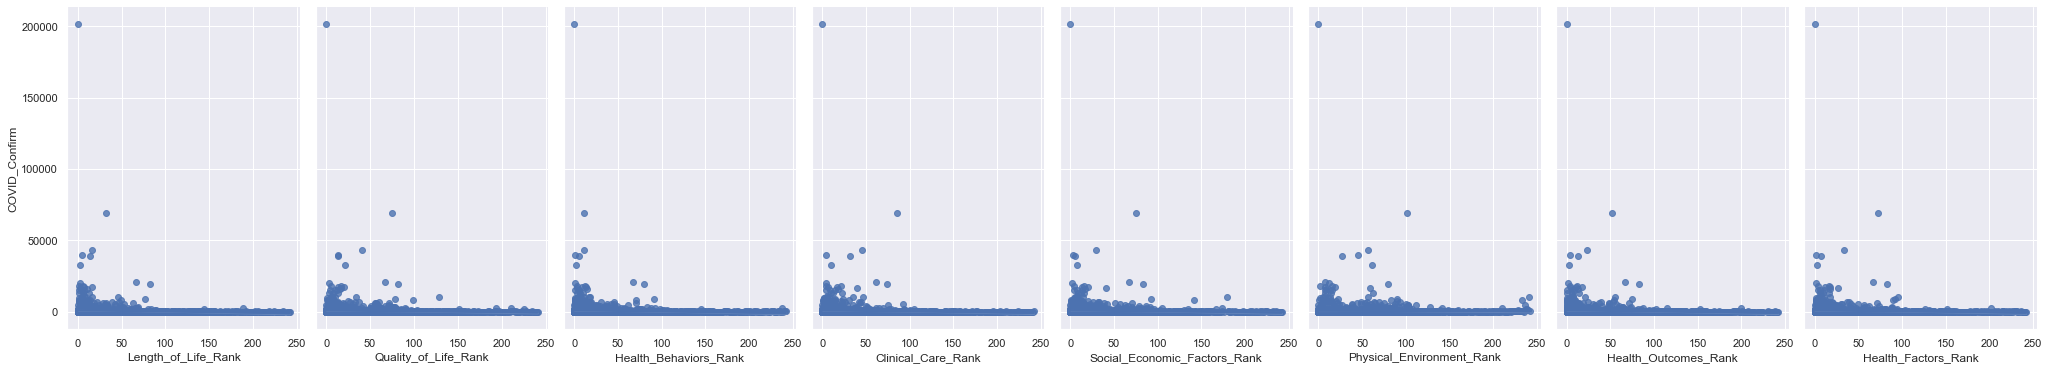

In [62]:
sns.pairplot(COVID_19_522_OVERALL_HEALTH, x_vars=['Length_of_Life_Rank','Quality_of_Life_Rank', 'Health_Behaviors_Rank', 'Clinical_Care_Rank', 'Social_Economic_Factors_Rank', 'Physical_Environment_Rank', 'Health_Outcomes_Rank', 'Health_Factors_Rank'],  y_vars='COVID_Confirm', height=5, aspect=0.7, kind='reg')

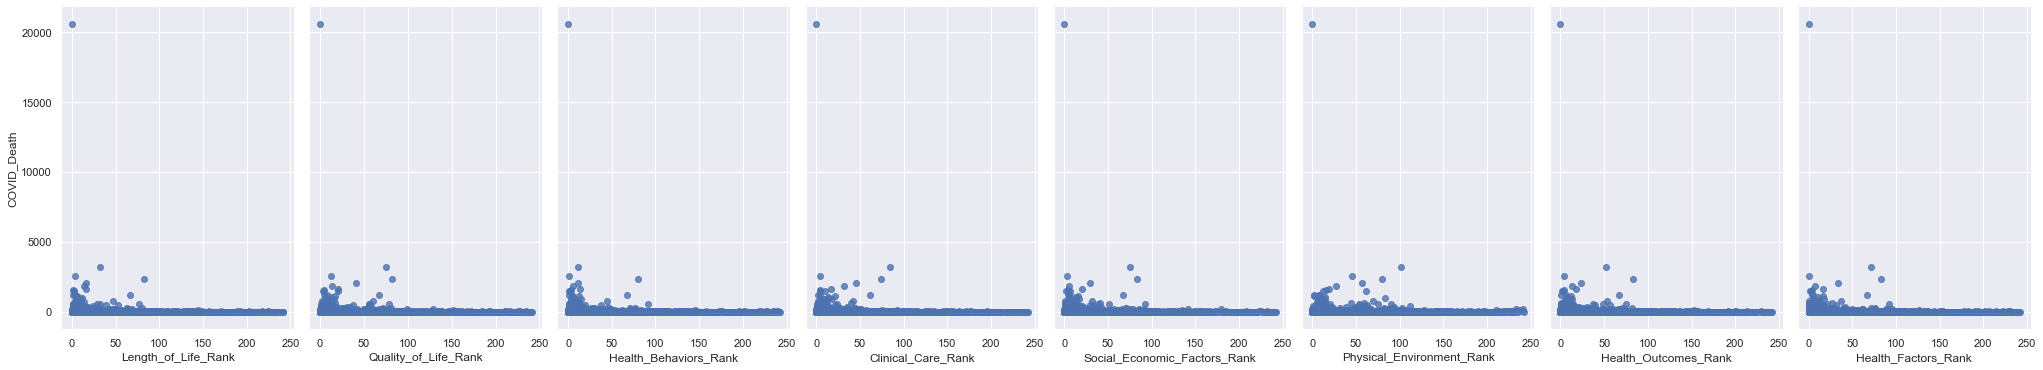

In [63]:
sns.pairplot(COVID_19_522_OVERALL_HEALTH, x_vars=['Length_of_Life_Rank','Quality_of_Life_Rank', 'Health_Behaviors_Rank', 'Clinical_Care_Rank', 'Social_Economic_Factors_Rank', 'Physical_Environment_Rank', 'Health_Outcomes_Rank', 'Health_Factors_Rank'],  y_vars='COVID_Death', height=5, aspect=0.7, kind='reg')

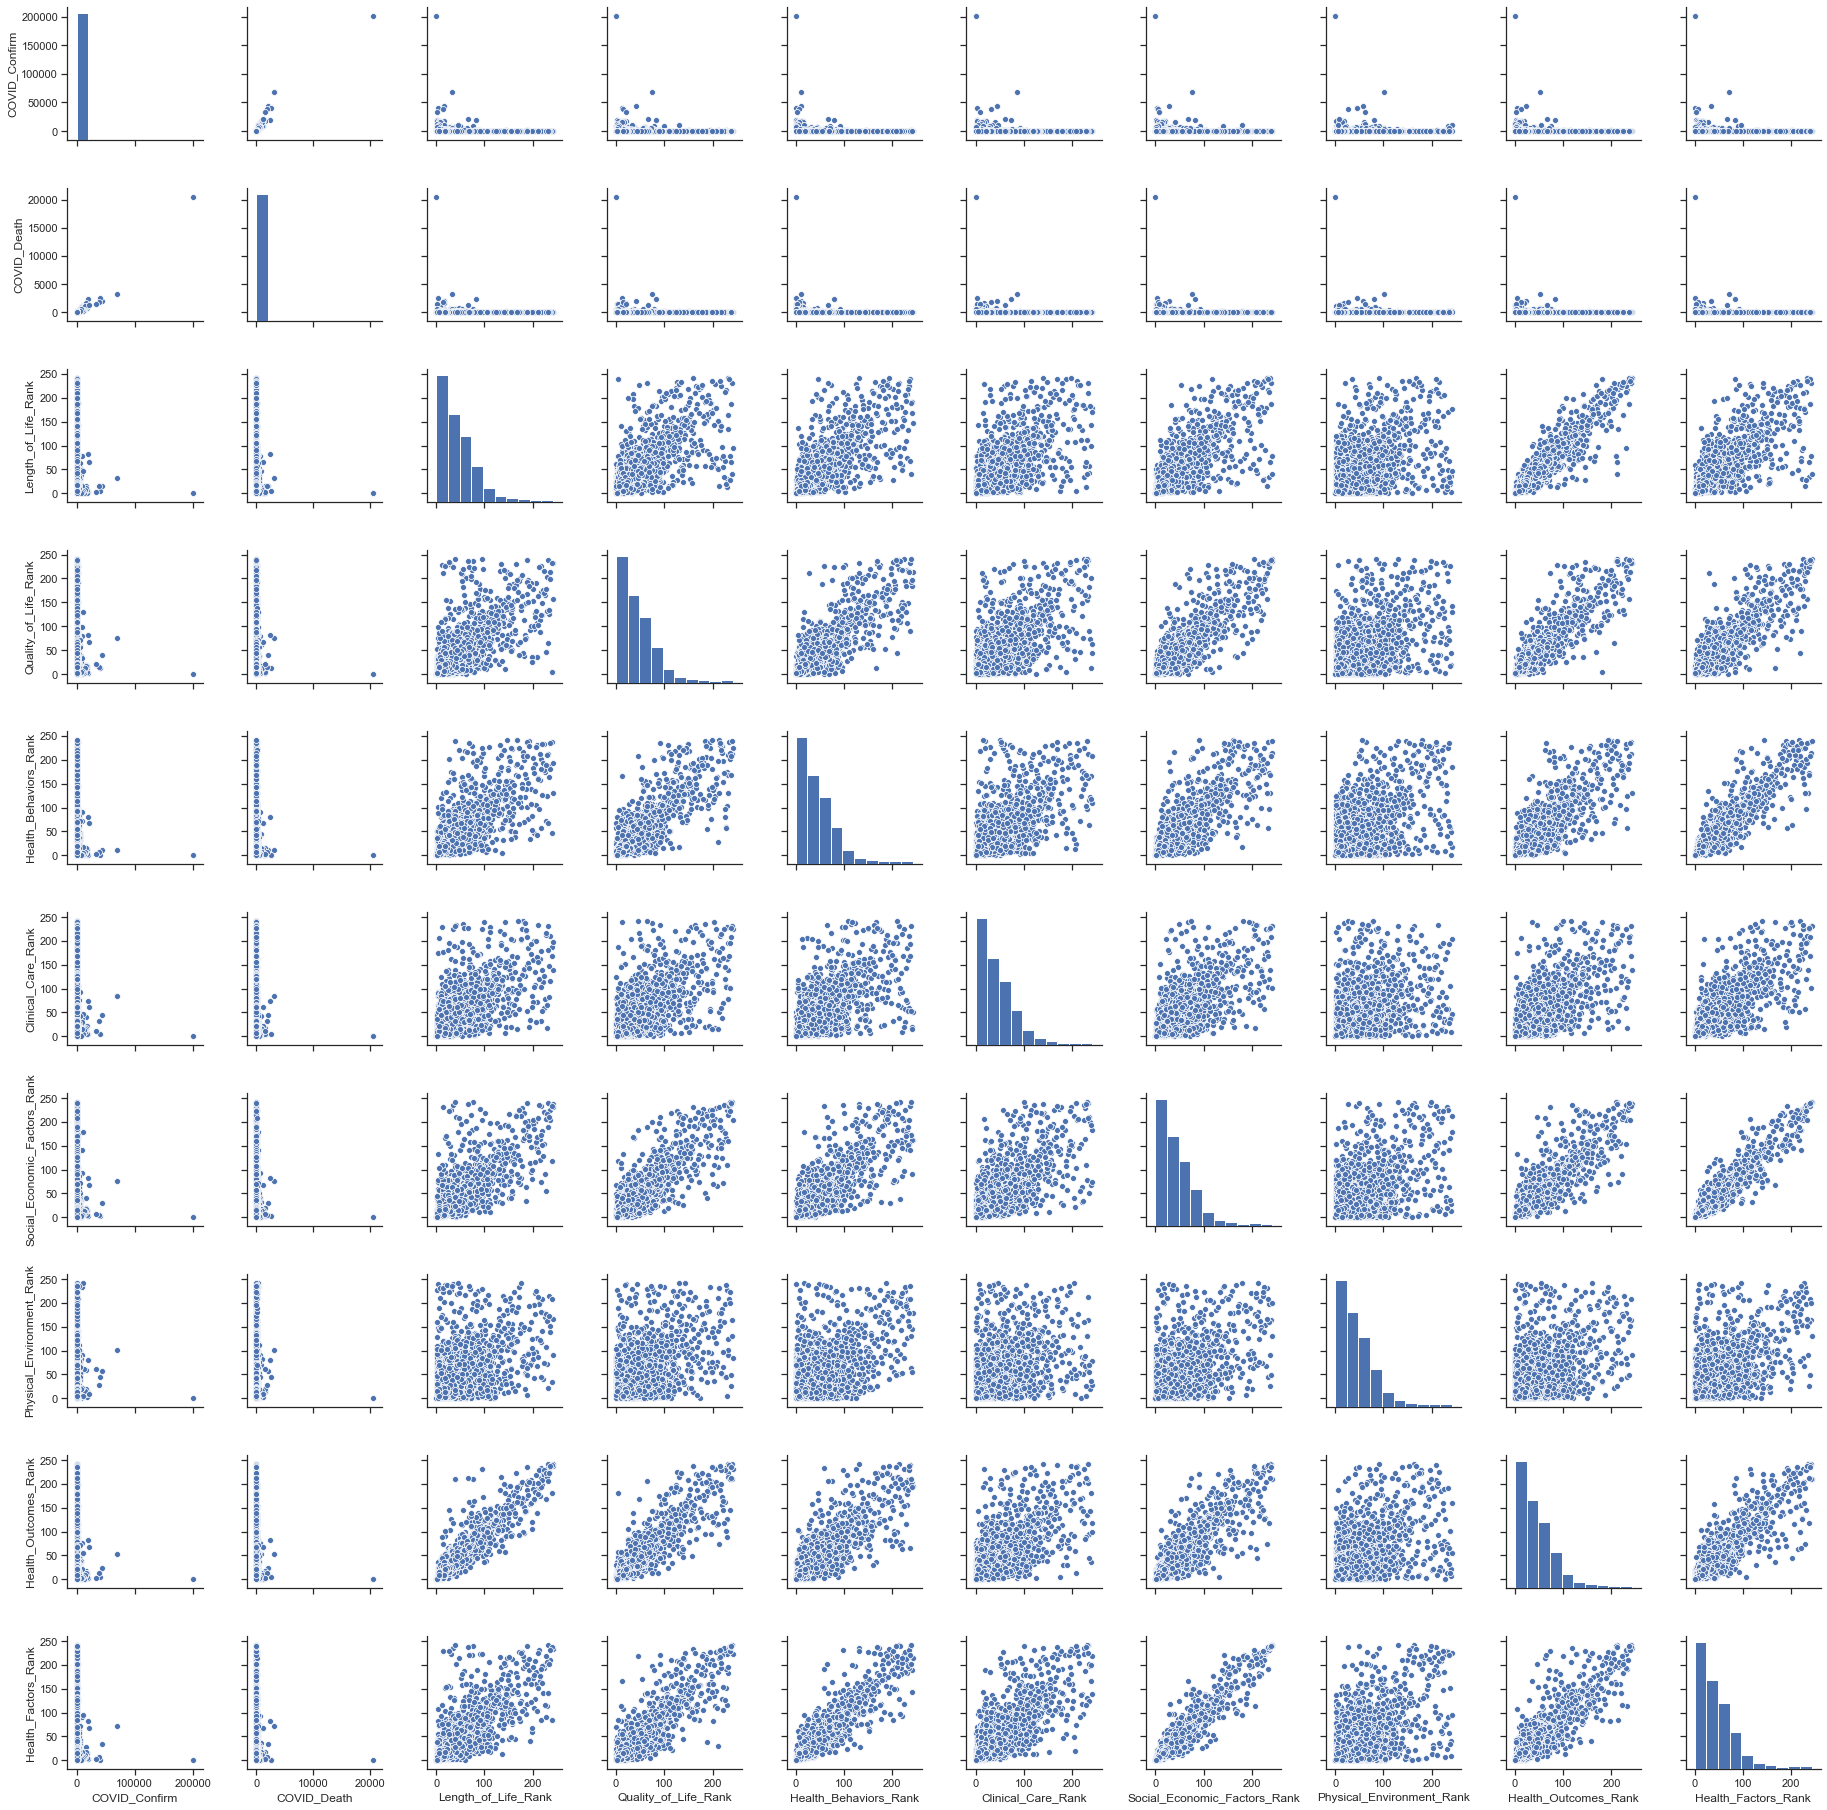

In [64]:
sns.set(style="ticks", color_codes=True)
pairp=g = sns.pairplot(COVID_19_522_OVERALL_HEALTH)
plt.show()


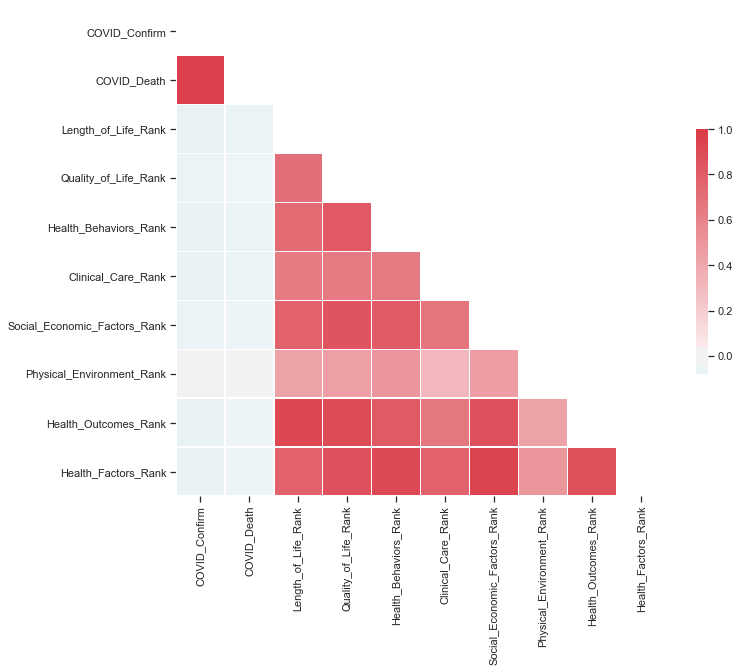

In [65]:
corr = COVID_19_522_OVERALL_HEALTH.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [66]:
COVID_19_522_OVERALL_HEALTH.tail()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
2927,WY,Wyoming,Sublette,3,0,2,4,5,9,8,17,2,7
2928,WY,Wyoming,Sweetwater,25,0,6,18,20,11,20,19,15,21
2929,WY,Wyoming,Teton,100,1,1,2,1,1,1,15,1,1
2930,WY,Wyoming,Uinta,13,0,18,21,19,6,17,13,21,17
2931,WY,Wyoming,Washakie,19,1,5,14,7,22,16,5,8,15


In [67]:
 COVID_19_522_OVERALL_HEALTH_POP = pandasql.sqldf("SELECT c.*, p.DensitySQMile FROM  COVID_19_522_OVERALL_HEALTH c JOIN MetropolitanPopulation p WHERE c.State_Name = c.State_Name AND c.County_Name = p.County_Name")

In [68]:
COVID_19_522_OVERALL_HEALTH_POP.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank,DensitySQMile
0,AL,Alabama,Autauga,149,3,18,5,12,15,3,51,11,8,91.8
1,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3,114.6
2,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3,177.3
3,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56,31.0
4,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56,48.6


In [69]:
COVID_19_522_DETAIL_HEALTH_POP = pandasql.sqldf("SELECT c.*, p.DensitySQMile FROM  COVID_19_522_DETAIL_HEALTH c JOIN MetropolitanPopulation p WHERE c.State_Name = c.State_Name AND c.County_Name = p.County_Name")

In [70]:
COVID_19_522_DETAIL_HEALTH_POP.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,...,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural,DensitySQMile
0,AL,Alabama,Autauga,149,3,827.0,450.0,532.0,111.0,445.0,...,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0,91.8
1,AL,Alabama,Baldwin,271,9,2753.0,351.0,518.0,111.0,349.0,...,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3,114.6
2,AL,Alabama,Baldwin,271,9,2753.0,351.0,518.0,111.0,349.0,...,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3,177.3
3,AL,Alabama,Barbour,104,1,418.0,434.0,477.0,111.0,395.0,...,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8,31.0
4,AL,Alabama,Barbour,104,1,418.0,434.0,477.0,111.0,395.0,...,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8,48.6


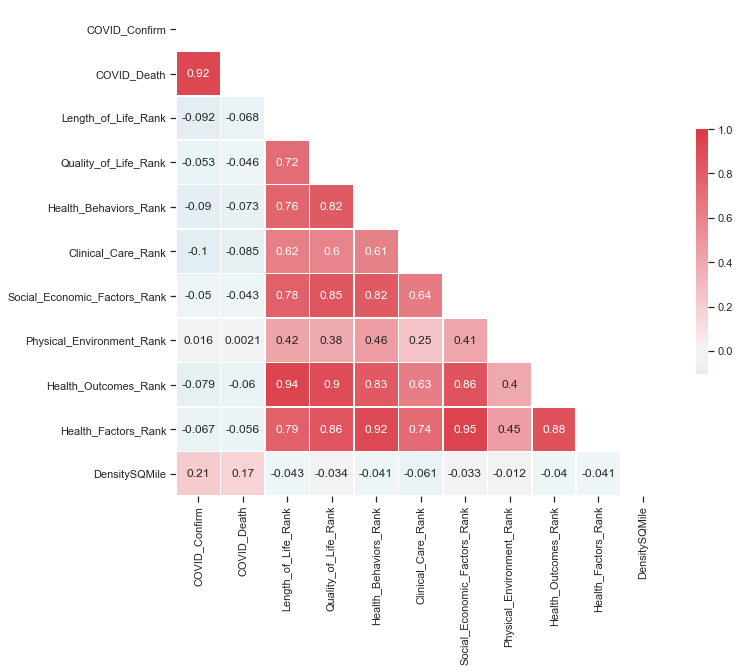

In [71]:
corr = COVID_19_522_OVERALL_HEALTH_POP.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


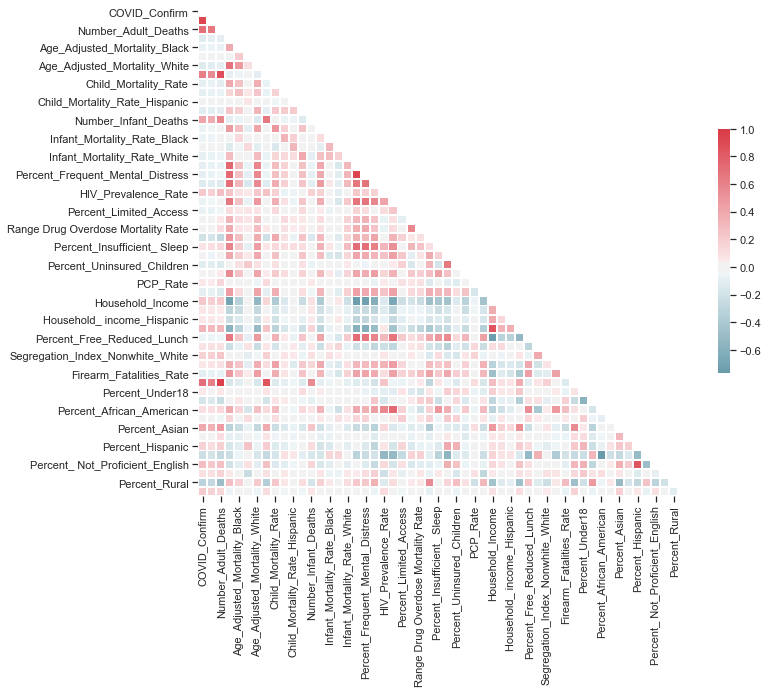

In [72]:
corr = COVID_19_522_DETAIL_HEALTH_POP.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5})
plt.show()


In [73]:
corr_matrix =  COVID_19_522_DETAIL_HEALTH_POP.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))


In [74]:
#pd.set_option('display.max_rows', None)
dfsol = DataFrame(sol)
dfsol.to_csv("data/export.csv")

In [75]:
#DETAIL_HEALTH_CORRELATION = LoadFile("data/DETAIL_HEALTH_CORRELATION.csv")

File name: data/DETAIL_HEALTH_CORRELATION.csv does not exist in C:\Users\kosmi\Documents\Syracuse\IST_718\Final folder


UnboundLocalError: local variable 'df' referenced before assignment

In [ ]:
#pd.set_option('display.max_rows', None)
#DETAIL_HEALTH_CORRELATION.head()

In [ ]:
#pandasql.sqldf("SELECT * FROM DETAIL_HEALTH_CORRELATION WHERE CORRELATION > 0.3")

In [76]:
COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'] = np.round(np.log(COVID_19_522_OVERALL_HEALTH.COVID_Confirm),0)


In [77]:
COVID_19_522_DETAIL_HEALTH['Log_COVID_Confirm'] = np.round(np.log(COVID_19_522_DETAIL_HEALTH.COVID_Confirm),0)

In [78]:
COVID_19_522_OVERALL_HEALTH['Log_COVID_Death'] = np.round(np.log(COVID_19_522_OVERALL_HEALTH.COVID_Death),0)

C:\Users\kosmi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [79]:
COVID_19_522_DETAIL_HEALTH['Log_COVID_Death'] = np.round(np.log(COVID_19_522_DETAIL_HEALTH.COVID_Death),0)

In [80]:
COVID_19_522_OVERALL_HEALTH.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank,Log_COVID_Confirm,Log_COVID_Death
0,AL,Alabama,Autauga,149,3,18,5,12,15,3,51,11,8,5.0,1.0
1,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3,6.0,2.0
2,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56,5.0,0.0
3,AL,Alabama,Bibb,55,1,53,25,39,42,42,29,41,37,4.0,0.0
4,AL,Alabama,Blount,49,1,17,12,11,41,13,54,14,19,4.0,0.0


In [81]:
COVID_19_522_DETAIL_HEALTH.head()

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,...,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural,Log_COVID_Confirm,Log_COVID_Death
0,AL,Alabama,Autauga,149,3,827.0,450.0,532.0,111.0,445.0,...,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0,5.0,1.0
1,AL,Alabama,Baldwin,271,9,2753.0,351.0,518.0,111.0,349.0,...,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3,6.0,2.0
2,AL,Alabama,Barbour,104,1,418.0,434.0,477.0,111.0,395.0,...,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8,5.0,0.0
3,AL,Alabama,Bibb,55,1,408.0,529.0,630.0,111.0,527.0,...,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4,4.0,0.0
4,AL,Alabama,Blount,49,1,996.0,480.0,630.0,111.0,527.0,...,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0,4.0,0.0


In [117]:
%%capture
COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'] = COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'].fillna(0)

In [118]:
COVID_19_522_OVERALL_HEALTH.Log_COVID_Confirm.unique()

array([ 5,  6,  4,  3,  2,  7,  8,  1,  0,  9, 11, 10, 12], dtype=int64)

In [121]:
%%capture
COVID_19_522_OVERALL_HEALTH['Log_COVID_Death'] = COVID_19_522_OVERALL_HEALTH['Log_COVID_Death'].fillna(0)

In [122]:
COVID_19_522_OVERALL_HEALTH.Log_COVID_Death.unique()

array([  1.,   2.,   0.,   3., -inf,   4.,   5.,   6.,   8.,   7.,  10.])

In [84]:
pandasql.sqldf("SELECT * FROM COVID_19_522_OVERALL_HEALTH WHERE Log_COVID_Confirm < 0")

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank,Log_COVID_Confirm,Log_COVID_Death


In [85]:
COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'] = COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'].astype(np.int64)

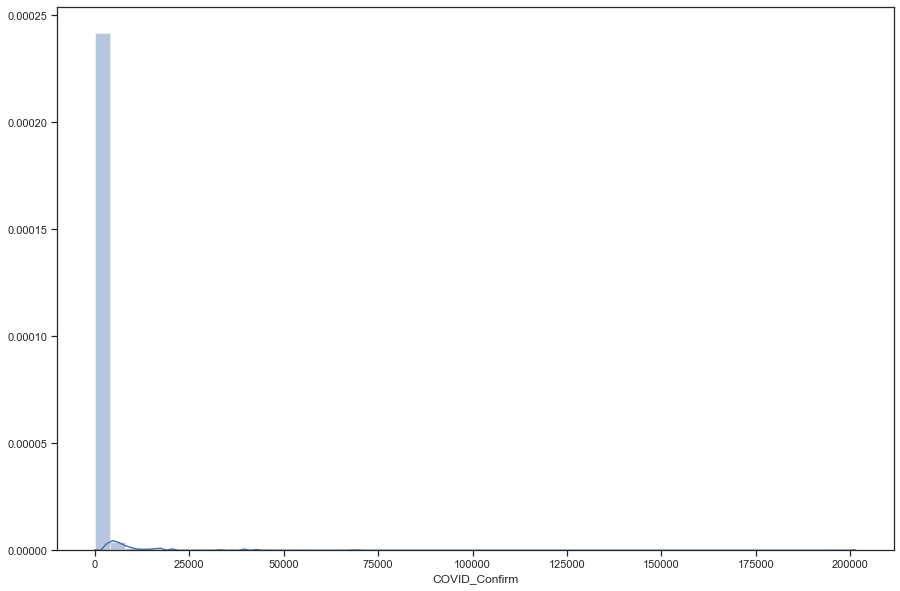

In [86]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(COVID_19_522_OVERALL_HEALTH['COVID_Confirm'])


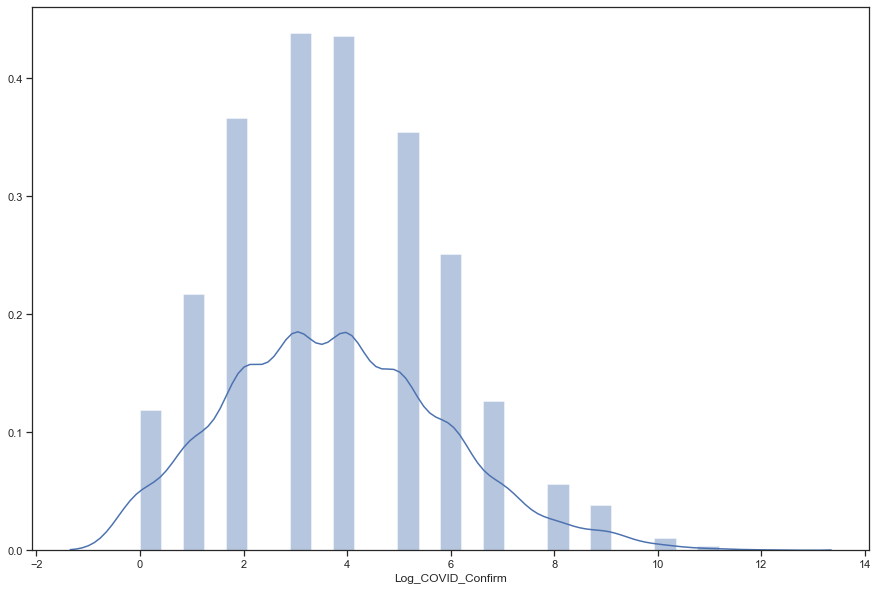

In [87]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(COVID_19_522_OVERALL_HEALTH['Log_COVID_Confirm'])


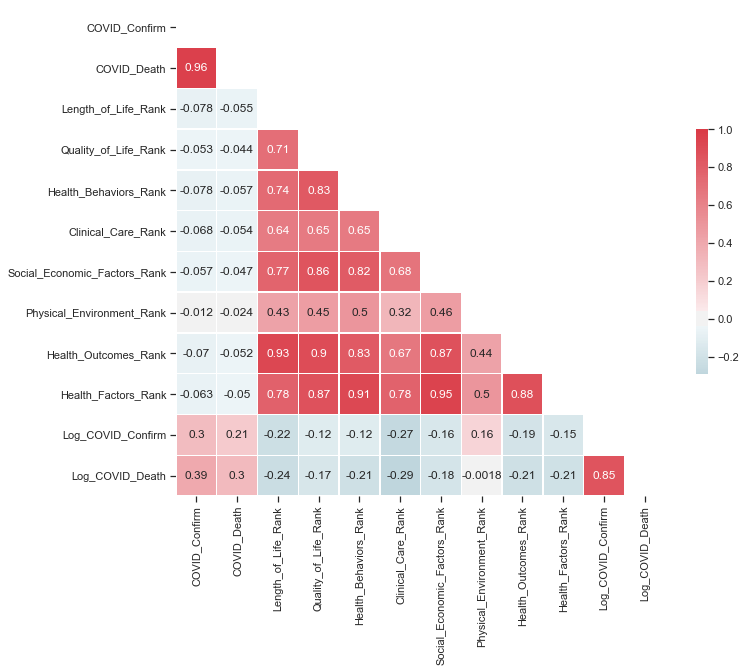

In [88]:
corr = COVID_19_522_OVERALL_HEALTH.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

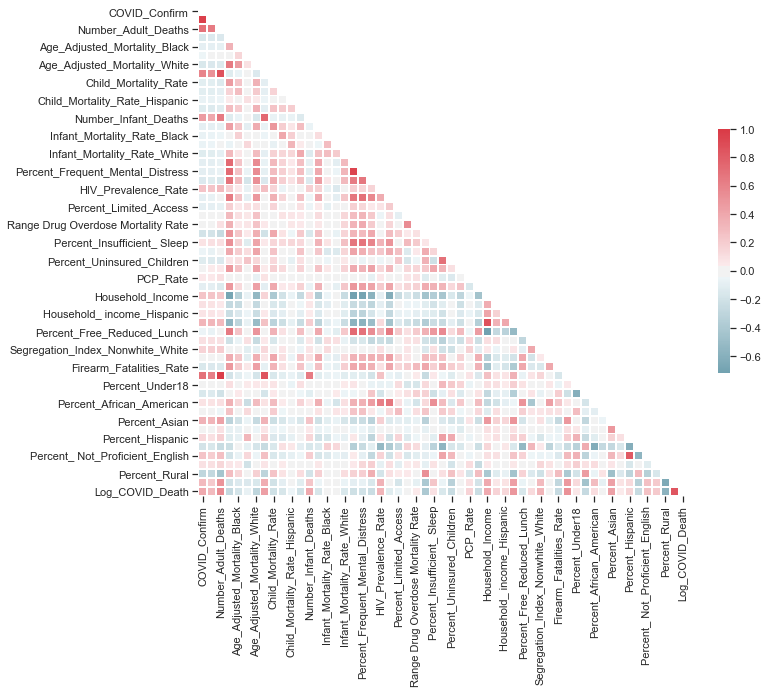

In [89]:

corr = COVID_19_522_DETAIL_HEALTH.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5})
plt.show()


In [90]:
dfcorr = DataFrame(corr).to_csv("data/DetailCorr.csv")

In [91]:
#print(corr["Log_COVID_Confirm"].sort_values(ascending=False))


In [92]:
#print(corr["Log_COVID_Death"].sort_values(ascending=False))

In [93]:
COVID_19_522_HEALTH_CORRELATION = pandasql.sqldf("SELECT c.State_Name, c.County_Name,c.COVID_Confirm, c.COVID_Death, c.Log_COVID_Death, c.Log_COVID_Confirm,  c.Percent_Rural,c.Percent_65_and_over,c.Percent_Disconnected_Youth,c.Percent_White,c.Percent_Uninsured_Children, c.Segregation_Index_Nonwhite_White, c.HIV_Prevalence_Rate, c.Household_Income, c.Percent_Asian,c.Population, c.[Household_ income_White] Household_income_White, p.DensitySQMile FROM COVID_19_522_DETAIL_HEALTH c LEFT JOIN MetropolitanPopulation p WHERE c.State_Name = p.State_Name AND c.County_Name = p.County_Name")

In [156]:
COVID_19_522_HEALTH_CORRELATION = COVID_19_522_HEALTH_CORRELATION.replace([np.inf, -np.inf], 0)

In [157]:
COVID_19_522_HEALTH_CORRELATION.Log_COVID_Death.unique()

array([1., 2., 0., 3., 4., 5., 6., 8., 7.])

In [158]:
COVID_19_522_HEALTH_CORRELATION.isna().sum()

State_Name                          0
County_Name                         0
COVID_Confirm                       0
COVID_Death                         0
Log_COVID_Death                     0
Log_COVID_Confirm                   0
Percent_Rural                       0
Percent_65_and_over                 0
Percent_Disconnected_Youth          0
Percent_White                       0
Percent_Uninsured_Children          0
Segregation_Index_Nonwhite_White    0
HIV_Prevalence_Rate                 0
Household_Income                    0
Percent_Asian                       0
Population                          0
Household_income_White              0
DensitySQMile                       0
dtype: int64

In [159]:
COVID_19_522_HEALTH_CORRELATION.shape

(2670, 18)

In [160]:
COVID_19_522_HEALTH_CORRELATION.head()

,State_Name,County_Name,COVID_Confirm,COVID_Death,Log_COVID_Death,Log_COVID_Confirm,Percent_Rural,Percent_65_and_over,Percent_Disconnected_Youth,Percent_White,Percent_Uninsured_Children,Segregation_Index_Nonwhite_White,HIV_Prevalence_Rate,Household_Income,Percent_Asian,Population,Household_income_White,DensitySQMile
0,Alabama,Autauga,149,3,1.0,5.0,42.0,14.7,15.0,75.0,3.0,24.0,226.0,54487.0,1.1,55416.0,58556.0,91.8
1,Alabama,Baldwin,271,9,2.0,6.0,42.3,19.7,15.0,83.2,3.0,31.0,164.0,56460.0,1.1,208563.0,54184.0,114.6
2,Alabama,Barbour,104,1,0.0,5.0,67.8,18.0,31.0,46.5,4.0,22.0,436.0,32884.0,0.5,25965.0,46673.0,31.0
3,Alabama,Bibb,55,1,0.0,4.0,68.4,15.4,25.0,74.4,3.0,42.0,192.0,43079.0,0.2,22643.0,42020.0,36.8
4,Alabama,Blount,49,1,0.0,4.0,90.0,18.0,15.0,87.5,4.0,24.0,95.0,47213.0,0.3,57704.0,48045.0,88.9


FileNotFoundError: [Errno 2] No such file or directory: 'plot/COVID_19_522_HEALTH_CORRELATION.png'

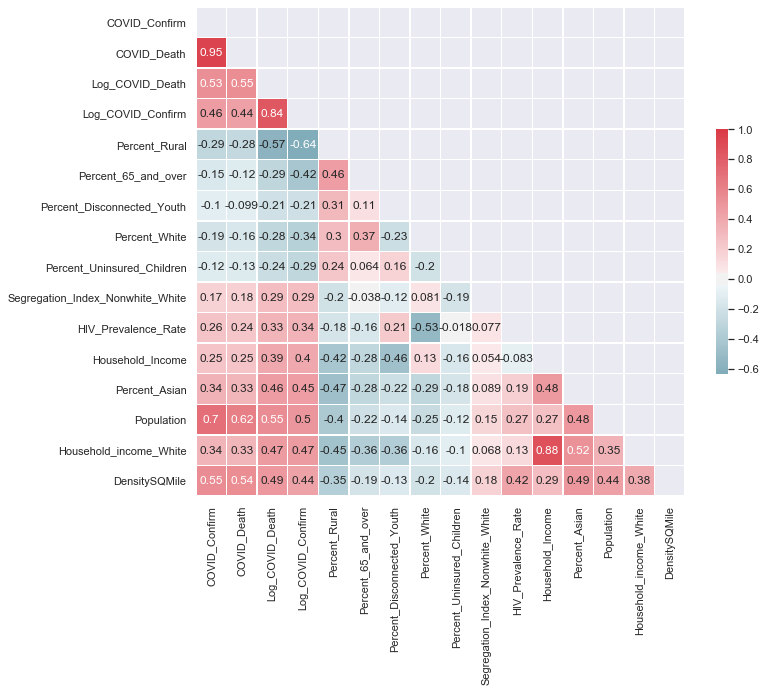

In [161]:
corr = COVID_19_522_HEALTH_CORRELATION.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.savefig("plot/COVID_19_522_HEALTH_CORRELATION.png", bbox_inches = 'tight', dpi=400)
plt.show()

In [162]:
# Train and Test Models
# y_Log_COVID_Death
# y_Log_COVID_Confirm

In [163]:
# Calculate VIF Factors
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.round(1)
# #Imports
# import pandas as pd
# import numpy as np
# from patsy import dmatrices
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [164]:
# Create correlation matrix
corr_matrix = COVID_19_522_HEALTH_CORRELATION.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]

In [165]:
COVID_19_522_HEALTH_CORRELATION.drop(COVID_19_522_HEALTH_CORRELATION[to_drop], axis=1)

,State_Name,County_Name,COVID_Confirm,Percent_Uninsured_Children,Segregation_Index_Nonwhite_White
0,Alabama,Autauga,149,3.0,24.0
1,Alabama,Baldwin,271,3.0,31.0
2,Alabama,Barbour,104,4.0,22.0
3,Alabama,Bibb,55,3.0,42.0
4,Alabama,Blount,49,4.0,24.0
...,...,...,...,...,...
2665,Wyoming,Sublette,3,10.0,30.0
2666,Wyoming,Sweetwater,25,7.0,29.0
2667,Wyoming,Teton,100,12.0,27.0
2668,Wyoming,Uinta,13,7.0,16.0


In [166]:
list(COVID_19_522_HEALTH_CORRELATION)

['State_Name',
 'County_Name',
 'COVID_Confirm',
 'COVID_Death',
 'Log_COVID_Death',
 'Log_COVID_Confirm',
 'Percent_Rural',
 'Percent_65_and_over',
 'Percent_Disconnected_Youth',
 'Percent_White',
 'Percent_Uninsured_Children',
 'Segregation_Index_Nonwhite_White',
 'HIV_Prevalence_Rate',
 'Household_Income',
 'Percent_Asian',
 'Population',
 'Household_income_White',
 'DensitySQMile']

In [167]:
# Creating train and test dataset
train, test = train_test_split(COVID_19_522_HEALTH_CORRELATION, test_size =  .30)

In [267]:
y_train_confirm_column = ['Log_COVID_Confirm']
x_train_confirm_column = ['Percent_Rural',
 'Percent_Disconnected_Youth',
 'Percent_Uninsured_Children',
 'Segregation_Index_Nonwhite_White',
 'HIV_Prevalence_Rate',
 'Percent_Asian',
 'Household_income_White']

In [268]:
y_train_death_column = ['Log_COVID_Death']
x_train_death_column = ['Percent_Rural',
 'Percent_65_and_over',
 'Percent_White',
 'Percent_Uninsured_Children',
 'Segregation_Index_Nonwhite_White',
 'HIV_Prevalence_Rate',
 'Percent_Asian',
 'Household_income_White']

In [269]:
# Setting up train and test data
# Setting up train and test data
y_train_confirm = DataFrame(train[y_train_confirm_column])
x_train_confirm = DataFrame(train[x_train_confirm_column])
y_test_confirm = DataFrame(test[y_train_confirm_column])
x_test_confirm = DataFrame(test[x_train_confirm_column])

In [270]:
# Setting up train and test data
y_train_death = DataFrame(train[y_train_death_column])
x_train_death = DataFrame(train[x_train_death_column])
y_test_death = DataFrame(test[y_train_death_column])
x_test_death = DataFrame(test[x_train_death_column])

In [271]:
x_test_death.head()

,Percent_Rural,Percent_65_and_over,Percent_White,Percent_Uninsured_Children,Segregation_Index_Nonwhite_White,HIV_Prevalence_Rate,Percent_Asian,Household_income_White
482,43.9,17.3,91.2,6.0,34.0,111.0,0.6,42162.0
2295,78.4,21.5,64.9,11.0,11.0,143.0,0.6,43048.0
2050,38.0,14.6,87.6,7.0,21.0,232.0,1.2,55022.0
2222,66.5,19.1,67.3,15.0,24.0,371.0,0.6,52389.0
912,27.5,17.1,90.2,4.0,39.0,127.0,0.5,50811.0


# Models

In [272]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
sns.set(color_codes=True)
import random
random.seed(123)

## OLS 

In [273]:
ols_model_fit_confirm = sm.OLS(y_train_confirm, x_train_confirm).fit()
ols_model_fit_confirm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Log_COVID_Confirm   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              2299.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                        0.00
Time:                        12:32:53   Log-Likelihood:                         -3294.7
No. Observations:                1869   AIC:                                      6603.
Df Residuals:                    1862   BIC:                                      6642.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Percent_Rural                       -0.0191      0.001    -16.011      0.000      -0.021      -0.017
Percent_Disconnected_Youth           0.0180      0.004      4.463      0.000       0.010       0.026
Percent_Uninsured_Children          -0.0349      0.011     -3.221      0.001      -0.056      -0.014
Segregation_Index_Nonwhite_White     0.0363      0.002     15.499      0.000       0.032       0.041
HIV_Prevalence_Rate                  0.0025      0.000     12.090      0.000       0.002       0.003
Percent_Asian                        0.0346      0.014      2.457      0.014       0.007       0.062
Household_income_White            6.196e-05      2e-06     30.908      0.000     5.8e-05    6.59e-05
==============================================================================
Omnibus:                       21.858   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.715
Skew:                          -0.243   Prob(JB):                     1.17e-05
Kurtosis:                       3.237   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0.98, 'Actual vs predicted confirm')

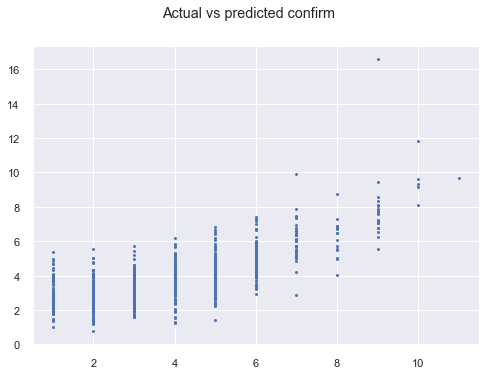

In [274]:
# Testing the confirm model
ols_model_pred_confirm = ols_model_fit_confirm.predict(x_test_confirm)
plt.plot(y_test_confirm, ols_model_pred_confirm, '.')
plt.suptitle('Actual vs predicted confirm')

In [275]:
ols_model_fit_death = sm.OLS(y_train_death, x_train_death).fit()
ols_model_fit_death.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Log_COVID_Death   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              415.1
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                        0.00
Time:                        12:33:00   Log-Likelihood:                         -2899.8
No. Observations:                1869   AIC:                                      5816.
Df Residuals:                    1861   BIC:                                      5860.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Percent_Rural                       -0.0169      0.001    -15.018      0.000      -0.019      -0.015
Percent_65_and_over                  0.0153      0.007      2.294      0.022       0.002       0.028
Percent_White                       -0.0059      0.002     -3.572      0.000      -0.009      -0.003
Percent_Uninsured_Children          -0.0457      0.009     -5.157      0.000      -0.063      -0.028
Segregation_Index_Nonwhite_White     0.0202      0.002      9.612      0.000       0.016       0.024
HIV_Prevalence_Rate                  0.0015      0.000      8.892      0.000       0.001       0.002
Percent_Asian                        0.0618      0.012      5.309      0.000       0.039       0.085
Household_income_White            2.885e-05   2.03e-06     14.179      0.000    2.49e-05    3.28e-05
==============================================================================
Omnibus:                       88.111   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.269
Skew:                           0.502   Prob(JB):                     1.38e-23
Kurtosis:                       3.587   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0.98, 'Actual vs predicted death rate')

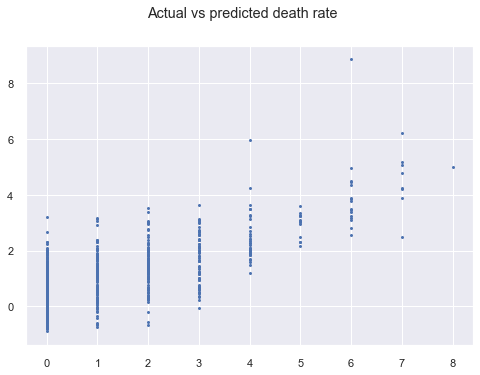

In [276]:
# Testing the death model
ols_model_pred_death = ols_model_fit_death.predict(x_test_death)
plt.plot(y_test_death, ols_model_pred_death, '.')
plt.suptitle('Actual vs predicted death rate')

## Linear Regression

In [277]:
# CONFIRM 

# Setting up variable for linear regression
reg_model = linear_model.LinearRegression()

# Train and test the modele
reg_model.fit(x_train_confirm, y_train_confirm)
y_pred_confirm = reg_model.predict(x_test_confirm)

In [278]:
#Model summary confirm 
print('coefficients: {}\nintercept: {}\nmean squared error: {}\nR-squared: {}'.format(
    reg_model.coef_,
    reg_model.intercept_,
    mean_squared_error(y_test_confirm, y_pred_confirm),
    r2_score(y_test_confirm, y_pred_confirm)
))

coefficients: [[-2.71523072e-02 -4.66169611e-03 -7.12252116e-02  1.99093933e-02
   2.41337779e-03  4.98901926e-02  2.92726359e-05]]
intercept: [3.33620816]
mean squared error: 1.6647925424125312
R-squared: 0.5656896058169136


Text(0.5, 0.98, 'Actual vs predicted confirm')

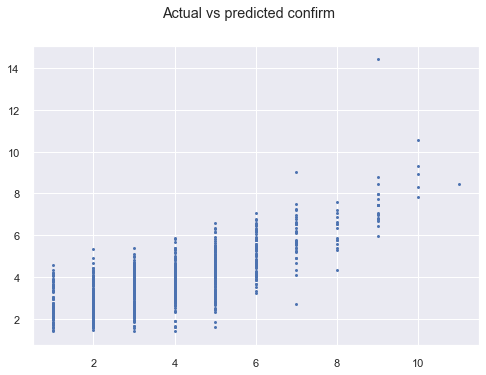

In [279]:
# Plotting actual and predicted values
plt.plot(y_test_confirm, y_pred_confirm, '.')
plt.suptitle('Actual vs predicted confirm')

In [280]:

# DEATH 

# Setting up variable for linear regression
reg_model = linear_model.LinearRegression()

# Train and test the modele
reg_model.fit(x_train_death, y_train_death)
y_pred_death = reg_model.predict(x_test_death)

In [281]:
#Model summary confirm 
print('coefficients: {}\nintercept: {}\nmean squared error: {}\nR-squared: {}'.format(
    reg_model.coef_,
    reg_model.intercept_,
    mean_squared_error(y_test_death, y_pred_death),
    r2_score(y_test_death, y_pred_death)
))

coefficients: [[-1.71091840e-02  1.26257799e-02 -6.60732330e-03 -4.88649991e-02
   1.96883233e-02  1.45156012e-03  6.16694862e-02  2.74502991e-05]]
intercept: [0.23319011]
mean squared error: 1.2630356944820567
R-squared: 0.5086988051507725


Text(0.5, 0.98, 'Actual vs predicted death')

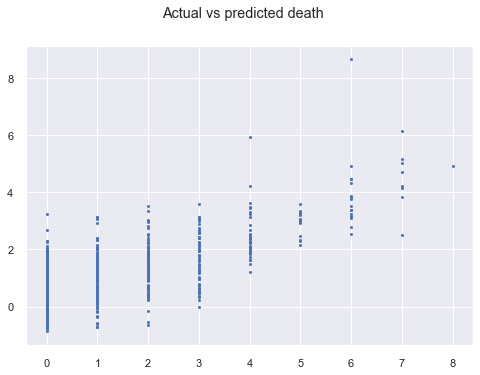

In [282]:
# Plotting actual and predicted values
plt.plot(y_test_death, y_pred_death, '.')
plt.suptitle('Actual vs predicted death')

In [283]:
#us_counties_cases_deaths.head()

## decision Tree

In [209]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(x_train_death, y_train_death)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [210]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(x_train_death.values,feature_names=x_train_death_column,)
exp = explainer.explain_instance(x_train_death.iloc[-1].values, dt.predict_proba)



ModuleNotFoundError: No module named 'lime'

In [208]:
fig = exp.as_pyplot_figure()
fig.tight_layout()
#fig.savefig("plot/mlpr_1301.png")



NameError: name 'exp' is not defined

#### Features for the sample push the prediction toward the right (death) or left (not dead).



In [189]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(x_train_confirm.values,feature_names=x_train_confirm_column,)
exp = explainer.explain_instance(x_train_confirm.iloc[-1].values, dt.predict_proba)
fig = exp.as_pyplot_figure()
fig.tight_layout()


ModuleNotFoundError: No module named 'lime'

# More models

In [211]:
confirm_case= COVID_19_522_HEALTH_CORRELATION [['Log_COVID_Confirm','Percent_Rural',
 'Percent_65_and_over',
 'Percent_Disconnected_Youth',
 'Percent_White',
 'Percent_Uninsured_Children',
 'Segregation_Index_Nonwhite_White',
 'HIV_Prevalence_Rate',
 'Percent_Asian',
 'Household_income_White']]

In [212]:
confirm_death= COVID_19_522_HEALTH_CORRELATION[['Log_COVID_Death','Percent_Rural',
 'Percent_65_and_over',
 'Percent_Disconnected_Youth',
 'Percent_White',
 'Percent_Uninsured_Children',
 'Segregation_Index_Nonwhite_White',
 'HIV_Prevalence_Rate',
 'Percent_Asian',
 'Household_income_White']]

In [213]:
from sklearn import (ensemble,preprocessing,tree,model_selection,)
from sklearn.metrics import (auc,confusion_matrix,roc_auc_score,roc_curve,)
from sklearn.model_selection import (train_test_split,StratifiedKFold,)
from yellowbrick.classifier import (ConfusionMatrix,ROCAUC,)
from yellowbrick.model_selection import (LearningCurve,)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [214]:
#scaler = StandardScaler()

In [215]:
#scalerFit=scaler.fit(confirm_case)

NameError: name 'scaler' is not defined

In [195]:
#scaled_features = scaler.transform(confirm_case)

In [196]:
#DataFrame(scaled_features).head()

In [197]:
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# sns.distplot(scaled_features['Log_COVID_Confirm'])


In [198]:
# df_confirm = pd.DataFrame(scaled_features,columns=confirm_case.columns[1:])
# df_confirm.head()

In [220]:
## Feature importance

In [226]:
# PIP INSTALL JANITOR
import janitor as jn
# import configparser

X, y = jn.get_features_targets(confirm_case, target_columns='Log_COVID_Confirm')  

C:\Users\kosmi\anaconda3\lib\site-packages\janitor\utils.py:282: FutureWarning:

get_features_targets() has moved. Please use ml.get_features_targets().



In [227]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(confirm_case, confirm_case['Log_COVID_Confirm'],test_size=0.33)

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



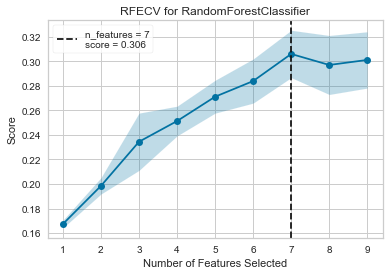

In [229]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    ensemble.RandomForestClassifier(
        n_estimators=100
    ),
    cv=4,
)
rfe.fit(X, y)
rfe.rfe_estimator_.ranking_
rfe.rfe_estimator_.n_features_
rfe.rfe_estimator_.support_
rfe.poof()
# fig.savefig("plot/mlpr_0803.png", dpi=300)

In [230]:
from sklearn.feature_selection import RFE
model = ensemble.RandomForestClassifier(
    n_estimators=100
)
rfe = RFE(model, 4)
rfe.fit(X, y)
X.columns[rfe.support_]

Index(['Percent_Rural', 'Percent_White', 'HIV_Prevalence_Rate',
       'Household_income_White'],
      dtype='object')

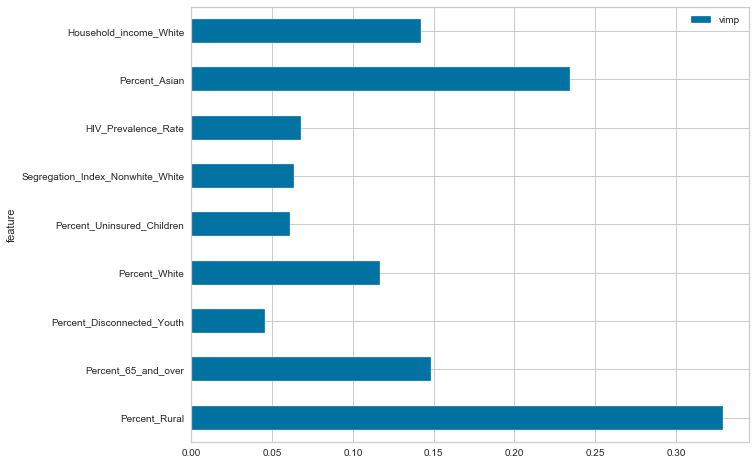

In [231]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
    X, y
)
fig, ax = plt.subplots(figsize=(10, 8))
(
    pd.DataFrame(
        {"feature": X.columns, "vimp": mic}
    )
    .set_index("feature")
    .plot.barh(ax=ax)
)
# fig.savefig("plot/mlpr_0804.png")

#  KNN

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
knn = KNeighborsClassifier(n_neighbors=10)

In [241]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [242]:
# PREDICTIONS AND EVALUATIONS
pred = knn.predict(X_test)

In [243]:
from sklearn.metrics import classification_report,confusion_matrix

In [244]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.22      0.14      0.17        98
         2.0       0.21      0.32      0.26       144
         3.0       0.22      0.30      0.25       175
         4.0       0.22      0.23      0.22       156
         5.0       0.16      0.13      0.14       136
         6.0       0.23      0.13      0.17        82
         7.0       0.24      0.12      0.16        42
         8.0       0.00      0.00      0.00        23
         9.0       0.25      0.05      0.09        19
        10.0       0.50      0.20      0.29         5
        11.0       0.00      0.00      0.00         2

    accuracy                           0.21       882
   macro avg       0.20      0.15      0.16       882
weighted avg       0.21      0.21      0.20       882



C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [245]:
# CHOOSING k VALUE

error_rate = []

# Will take some time
for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

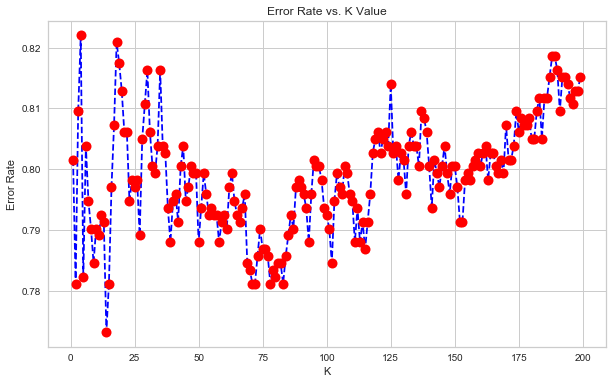

In [246]:
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [248]:
# NOW WITH K=
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=220')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=220


[[ 5 33 25 21  8  5  1  0  0  0  0]
 [ 3 47 35 31 19  8  1  0  0  0  0]
 [ 8 51 46 44 21  5  0  0  0  0  0]
 [ 3 40 49 36 12 11  5  0  0  0  0]
 [ 7 32 31 41 13 11  1  0  0  0  0]
 [ 0 17 17 21 12 13  1  0  1  0  0]
 [ 1  5  7  6  5 13  4  0  1  0  0]
 [ 1  3  4  2  5  6  1  0  1  0  0]
 [ 0  2  1  2  2  5  6  0  1  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0]]


              precision    recall  f1-score   support

         1.0       0.17      0.05      0.08        98
         2.0       0.20      0.33      0.25       144
         3.0       0.21      0.26      0.24       175
         4.0       0.18      0.23      0.20       156
         5.0       0.13      0.10      0.11       136
         6.0       0.16      0.16      0.16        82
         7.0       0.20      0.10      0.13        42
         8.0       0.00      0.00      0.00        23
         9.0       0.25      0.05      0.09        19
        10.0       0.00      0.00      0.00    

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# SVM

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [250]:
from sklearn.svm import SVC

In [251]:
svc_model = SVC()

In [252]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
# MODEL EVALUATION
predictions = svc_model.predict(X_test)



In [254]:
from sklearn.metrics import classification_report,confusion_matrix

In [255]:
print(confusion_matrix(y_test,predictions))

[[  0   0  23  49   0   0   0   0   0   0   0]
 [  0   0  35  84   0   1   1   0   0   0   0]
 [  0   0  44 118   0   4   0   0   0   0   0]
 [  0   0  27 102   0   0   0   0   0   0   0]
 [  0   0  27 102   0   1   0   0   0   0   0]
 [  0   0   7  75   0   3   0   0   0   0   0]
 [  0   0   1  41   0   7   1   0   0   0   0]
 [  0   0   0  20   0   4   1   0   0   0   0]
 [  0   0   0   8   0   5   2   0   0   0   0]
 [  0   0   0   1   0   5   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0]]


In [256]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        72
         2.0       0.00      0.00      0.00       121
         3.0       0.27      0.27      0.27       166
         4.0       0.17      0.79      0.28       129
         5.0       0.00      0.00      0.00       130
         6.0       0.10      0.04      0.05        85
         7.0       0.17      0.02      0.04        50
         8.0       0.00      0.00      0.00        25
         9.0       0.00      0.00      0.00        15
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00         2

    accuracy                           0.19       801
   macro avg       0.06      0.10      0.06       801
weighted avg       0.10      0.19      0.11       801



C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [257]:
# GridSearch

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [260]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   1.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   1.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.8s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.5s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   1.5s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [261]:
grid_predictions = grid.predict(X_test)

In [262]:
print(confusion_matrix(y_test,grid_predictions))

[[  0   2   0  70   0   0   0   0   0   0   0]
 [  0   1   3 117   0   0   0   0   0   0   0]
 [  0   0   2 164   0   0   0   0   0   0   0]
 [  0   0   1 128   0   0   0   0   0   0   0]
 [  0   0   0 130   0   0   0   0   0   0   0]
 [  0   0   0  85   0   0   0   0   0   0   0]
 [  0   0   0  50   0   0   0   0   0   0   0]
 [  0   0   0  25   0   0   0   0   0   0   0]
 [  0   0   0  15   0   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0]]


In [263]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        72
         2.0       0.33      0.01      0.02       121
         3.0       0.33      0.01      0.02       166
         4.0       0.16      0.99      0.28       129
         5.0       0.00      0.00      0.00       130
         6.0       0.00      0.00      0.00        85
         7.0       0.00      0.00      0.00        50
         8.0       0.00      0.00      0.00        25
         9.0       0.00      0.00      0.00        15
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00         2

    accuracy                           0.16       801
   macro avg       0.08      0.09      0.03       801
weighted avg       0.15      0.16      0.05       801



C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.



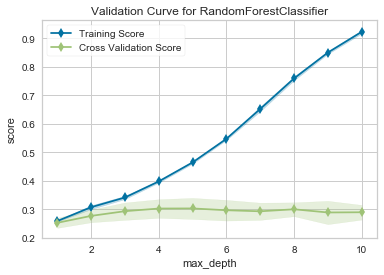

In [264]:
from yellowbrick.model_selection import (ValidationCurve,)
fig, ax = plt.subplots(figsize=(6, 4))
vc_viz = ValidationCurve(

RandomForestClassifier(n_estimators=100),
param_name="max_depth",
param_range=np.arange(1, 11),cv=10,n_jobs=-1,)

vc_viz.fit(X, y)
vc_viz.poof()
#fig.savefig("plot/mlpr_1101.png", dpi=300)




C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\Users\kosmi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.



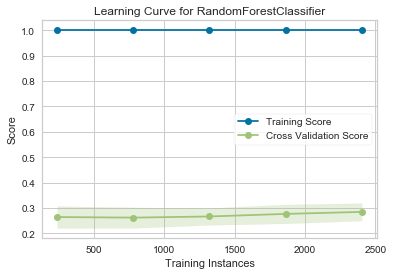

In [265]:
from yellowbrick.model_selection import (LearningCurve,)

fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(RandomForestClassifier(n_estimators=100), cv=10,)

lc3_viz.fit(X, y)
lc3_viz.poof()
#fig.savefig("plot/mlpr_1102.png", dpi=300)

